<a href="https://colab.research.google.com/github/Jobmrtall/TB_burden_analysis_and-regression/blob/main/outlier_cleaning_%26descriptive_statcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
tb=pd.read_csv('https://raw.githubusercontent.com/Jobmrtall/MSD/refs/heads/main/tb_cleand.csv')
rename_dict = {
    "Country or territory name": "Country",
    "ISO 2-character country/territory code": "ISO2",
    "ISO 3-character country/territory code": "ISO3",
    "ISO numeric country/territory code": "ISONum",
    "Region": "Region",
    "Year": "Year",
    "Estimated total population number": "Pop",
    "Estimated prevalence of TB (all forms) per 100 000 population": "TB_Prev_100k",
    "Estimated prevalence of TB (all forms) per 100 000 population, low bound": "TB_Prev_LB",
    "Estimated prevalence of TB (all forms) per 100 000 population, high bound": "TB_Prev_HB",
    "Estimated prevalence of TB (all forms)": "TB_Prev",
    "Estimated prevalence of TB (all forms), low bound": "TB_Prev_L",
    "Estimated prevalence of TB (all forms), high bound": "TB_Prev_H",
    "Method to derive prevalence estimates": "Prev_Method",
    "Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population": "TB_Mort_100k",
    "Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound": "TB_Mort_100k_LB",
    "Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound": "TB_Mort_100k_HB",
    "Estimated number of deaths from TB (all forms, excluding HIV)": "TB_Deaths",
    "Estimated number of deaths from TB (all forms, excluding HIV), low bound": "TB_Deaths_LB",
    "Estimated number of deaths from TB (all forms, excluding HIV), high bound": "TB_Deaths_HB",
    "Estimated mortality of TB cases who are HIV-positive, per 100 000 population": "TB_HIV_Mort_100k",
    "Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound": "TB_HIV_Mort_100k_LB",
    "Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound": "TB_HIV_Mort_100k_HB",
    "Estimated number of deaths from TB in people who are HIV-positive": "TB_HIV_Deaths",
    "Estimated number of deaths from TB in people who are HIV-positive, low bound": "TB_HIV_Deaths_LB",
    "Estimated number of deaths from TB in people who are HIV-positive, high bound": "TB_HIV_Deaths_HB",
    "Method to derive mortality estimates": "Mort_Method",
    "Estimated incidence (all forms) per 100 000 population": "TB_Inc_100k",
    "Estimated incidence (all forms) per 100 000 population, low bound": "TB_Inc_LB",
    "Estimated incidence (all forms) per 100 000 population, high bound": "TB_Inc_HB",
    "Estimated number of incident cases (all forms)": "TB_Cases",
    "Estimated number of incident cases (all forms), low bound": "TB_Cases_LB",
    "Estimated number of incident cases (all forms), high bound": "TB_Cases_HB",
    "Method to derive incidence estimates": "Inc_Method",
    "Estimated HIV in incident TB (percent)": "TB_HIV_Perc",
    "Estimated HIV in incident TB (percent), low bound": "TB_HIV_Perc_LB",
    "Estimated HIV in incident TB (percent), high bound": "TB_HIV_Perc_HB",
    "Estimated incidence of TB cases who are HIV-positive per 100 000 population": "TB_HIV_Inc_100k",
    "Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound": "TB_HIV_Inc_100k_LB",
    "Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound": "TB_HIV_Inc_100k_HB",
    "Estimated incidence of TB cases who are HIV-positive": "TB_HIV_Cases",
    "Estimated incidence of TB cases who are HIV-positive, low bound": "TB_HIV_Cases_LB",
    "Estimated incidence of TB cases who are HIV-positive, high bound": "TB_HIV_Cases_HB",
    "Case detection rate (all forms), percent": "Case_Detect",
    "Case detection rate (all forms), percent, low bound": "Case_Detect_LB",
    "Case detection rate (all forms), percent, high bound": "Case_Detect_HB"
}

# Apply renaming
tb.rename(columns=rename_dict, inplace=True)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


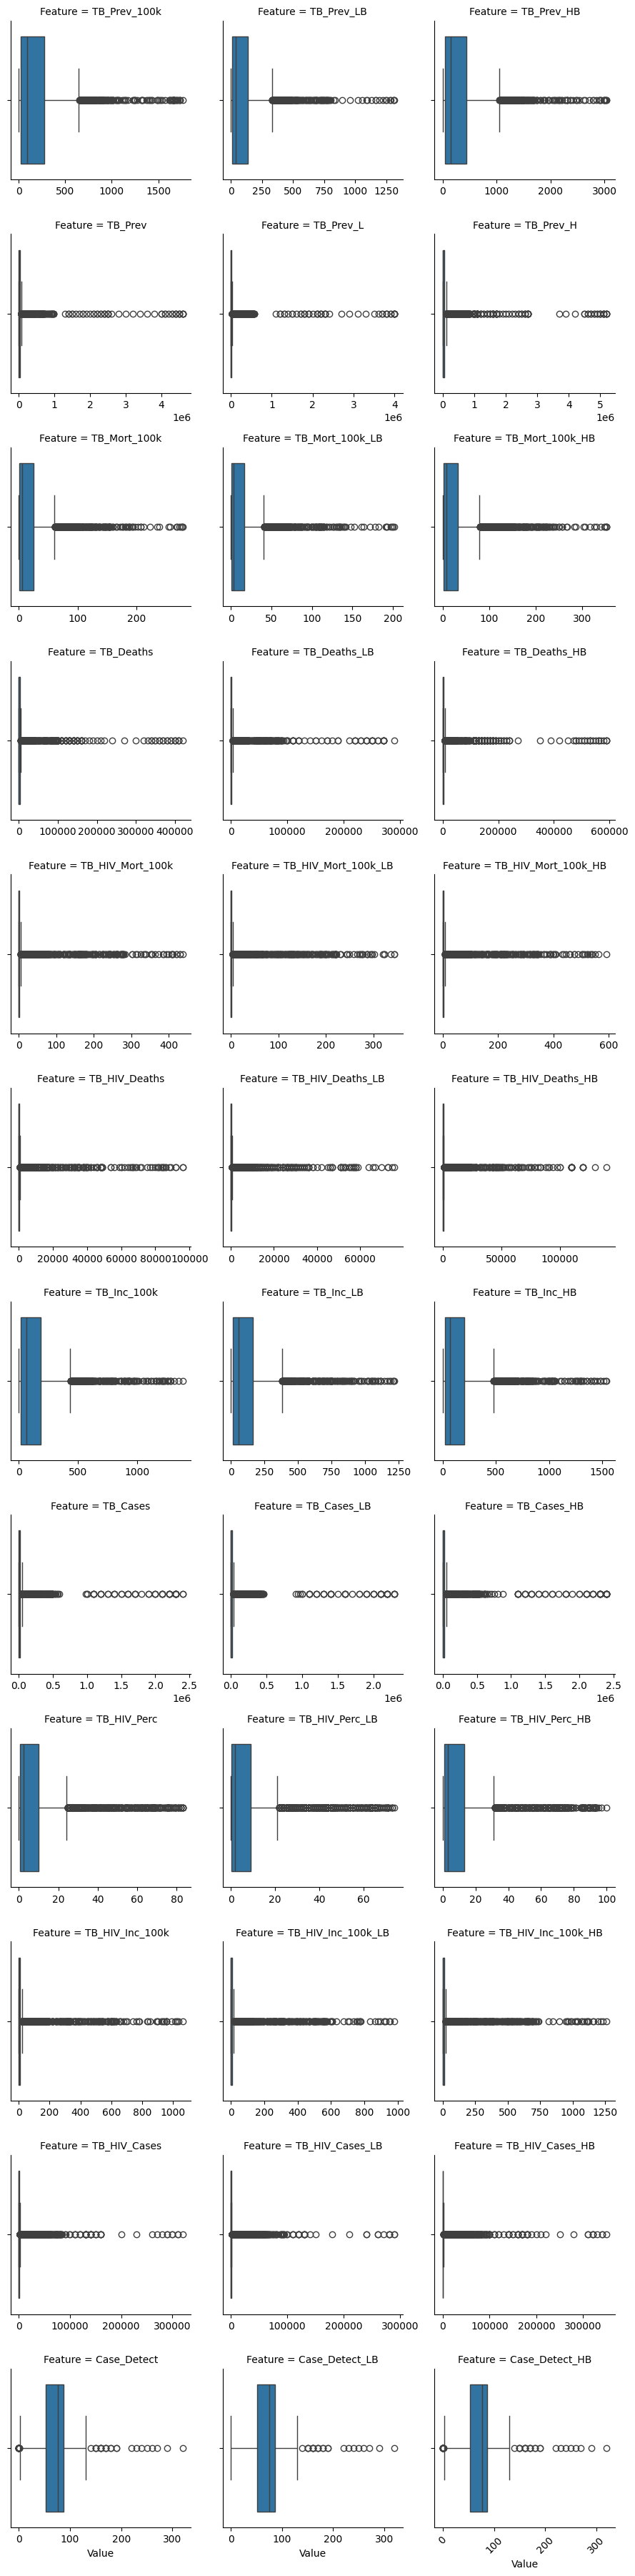

In [ ]:
tf = tb.select_dtypes(include=['float64']).columns

# Reshape data to long format for FacetGrid
tb_melted = tb.melt(value_vars=tf, var_name='Feature', value_name='Value')

# Create the FacetGrid
g = sns.FacetGrid(tb_melted, col='Feature', col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, 'Value')

# Adjust layout
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Compute IQR-based lower and upper bounds
Q1 = tb[tf].quantile(0.25)
Q3 = tb[tf].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip values to IQR range
tb[tf] = tb[tf].clip(lower=lower_bound, upper=upper_bound, axis=1)

tb.isna().sum()

,0
Country,0
ISO2,0
ISO3,0
ISONum,0
Region,0
Year,0
Pop,0
TB_Prev_100k,0
TB_Prev_LB,0
TB_Prev_HB,0


In [ ]:
tb.shape

(5002, 46)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


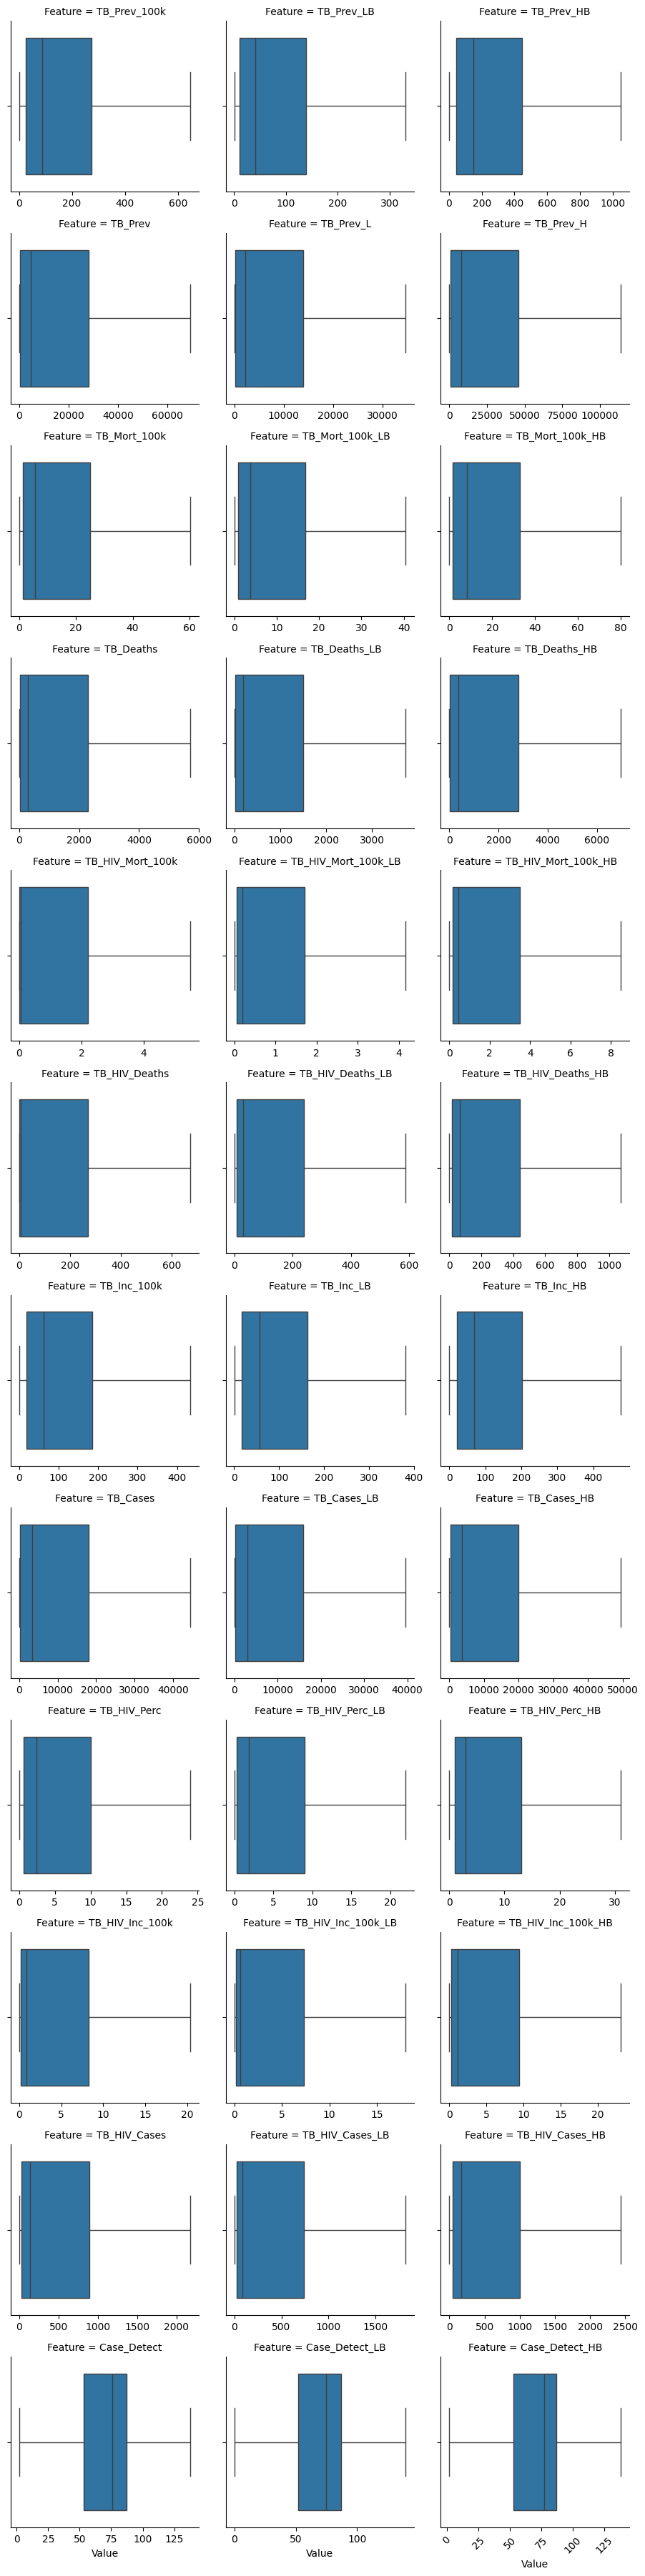

In [ ]:
tf = tb.select_dtypes(include=['float64']).columns

# Reshape data to long format for FacetGrid
tb_melted = tb.melt(value_vars=tf, var_name='Feature', value_name='Value')

# Create the FacetGrid
g = sns.FacetGrid(tb_melted, col='Feature', col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, 'Value')

# Adjust layout
plt.xticks(rotation=45)
plt.show()

In [ ]:
from google.colab import files
tb.to_csv('tb_outlier_cleaned.csv',index=False)
files.download('tb_outlier_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 46 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Country or territory name                                                                       5002 non-null   object 
 1   ISO 2-character country/territory code                                                          5002 non-null   object 
 2   ISO 3-character country/territory code                                                          5002 non-null   object 
 3   ISO numeric country/territory code                                                              5002 non-null   int64  
 4   Region                                                                                          5002 non-null   object 
 5   Year         

In [ ]:
tb.groupby('Region').describe(include=[float])

Estimated prevalence of TB (all forms) per 100 000 population  \
                                                               count   
Region                                                                 
AFR                                                1083.0              
AMR                                                1045.0              
EMR                                                 528.0              
EUR                                                1269.0              
SEA                                                 252.0              
WPR                                                 825.0              

                                                                    \
              mean         std    min    25%    50%     75%    max   
Region                                                               
AFR     331.695753  191.750355  15.00  151.0  322.0  479.00  647.5   
AMR      64.719445   80.208763   0.95   12.0   37.0   76.00  400.0   
EMR     143.515909  190.869760   2.70   23.0   51.0  205.75  647.5   
EUR      89.991292  130.188088   0.91   12.0   30.0  114.00  647.5   
SEA     368.882937  187.565652  51.00  216.0  407.0  487.50  647.5   
WPR     214.872848  216.621508   6.70   51.0  115.0  339.00  647.5   

       Estimated prevalence of TB (all forms) per 100 000 population, low bound  \
                                                                          count   
Region                                                                            
AFR                                                1083.0                         
AMR                                                1045.0                         
EMR                                                 528.0                         
EUR                                                1269.0                         
SEA                                                 252.0                         
WPR                                                 825.0                         

                    ... Case detection rate (all forms), percent, low bound  \
              mean  ...                                                 75%   
Region              ...                                                       
AFR     175.719760  ...                                              63.00    
AMR      31.744278  ...                                              87.00    
EMR      74.786553  ...                                              87.00    
EUR      43.194358  ...                                              88.00    
SEA     184.658730  ...                                              70.25    
WPR     105.443273  ...                                              87.00    

              Case detection rate (all forms), percent, high bound             \
          max                                                count       mean   
Region                                                                          
AFR     139.5                                             1083.0    50.323638   
AMR     139.5                                             1045.0    73.835120   
EMR     139.5                                              528.0    72.764015   
EUR     139.5                                             1269.0    79.058629   
SEA      92.0                                              252.0    53.274603   
WPR     139.5                                              825.0    73.185333   

                                                  
              std  min    25%   50%   75%    max  
Region                                            
AFR     20.145725  2.4  38.00  50.0  63.5  138.0  
AMR     21.388848  2.0  66.00  82.0  87.0  138.0  
EMR     25.723108  2.0  58.00  84.0  87.0  138.0  
EUR     18.010313  3.3  74.00  85.0  88.5  138.0  
SEA     22.774979  2.0  39.75  56.5  71.0   92.0  
WPR     21.979758  2.0  63.00  84.0  87.0  138.0  

[6 rows x 288 columns]

In [ ]:
tb_r_y=tb.groupby(['Year','Region']).describe(include=[float])
tb_r_y


Estimated prevalence of TB (all forms) per 100 000 population  \
                                                                    count   
Year Region                                                                 
1990 AFR                                                  45.0              
     AMR                                                  42.0              
     EMR                                                  22.0              
     EUR                                                  53.0              
     SEA                                                  10.0              
...                                                        ...              
2013 AMR                                                  43.0              
     EMR                                                  22.0              
     EUR                                                  54.0              
     SEA                                                  11.0              
     WPR                                                  34.0              

                                                                           \
                   mean         std    min      25%    50%     75%    max   
Year Region                                                                 
1990 AFR     362.488889  197.088308   52.0  175.000  339.0  548.00  647.5   
     AMR      90.328571  107.029420    2.5   16.000   57.0  122.50  400.0   
     EMR     165.818182  205.154155   12.0   33.250   63.0  260.00  647.5   
     EUR      81.822642  127.729049    5.0   17.000   43.0   88.00  647.5   
     SEA     414.200000  176.054632  111.0  300.750  454.0  498.00  647.5   
...                 ...         ...    ...      ...    ...     ...    ...   
2013 AMR      45.523256   54.081111    1.9    9.450   26.0   58.00  254.0   
     EMR     122.745455  182.289766    2.7   20.250   35.0  117.00  647.5   
     EUR      50.905556   62.848790    1.9    8.625   20.5   81.00  245.0   
     SEA     296.136364  190.976974   57.0  172.500  211.0  437.50  647.5   
     WPR     167.191176  188.325124    7.6   28.250   93.5  242.75  647.5   

            Estimated prevalence of TB (all forms) per 100 000 population, low bound  \
                                                                               count   
Year Region                                                                            
1990 AFR                                                  45.0                         
     AMR                                                  42.0                         
     EMR                                                  22.0                         
     EUR                                                  53.0                         
     SEA                                                  10.0                         
...                                                        ...                         
2013 AMR                                                  43.0                         
     EMR                                                  22.0                         
     EUR                                                  54.0                         
     SEA                                                  11.0                         
     WPR                                                  34.0                         

                         ...  \
                   mean  ...   
Year Region              ...   
1990 AFR     182.511111  ...   
     AMR      42.724286  ...   
     EMR      82.490909  ...   
     EUR      38.822642  ...   
     SEA     203.100000  ...   
...                 ...  ...   
2013 AMR      21.881163  ...   
     EMR      65.677273  ...   
     EUR      23.483704  ...   
     SEA     147.000000  ...   
     WPR      86.326471  ...   

            Case detection rate (all forms), percent, low bound         \
                                                            75%    max   
Year Region             

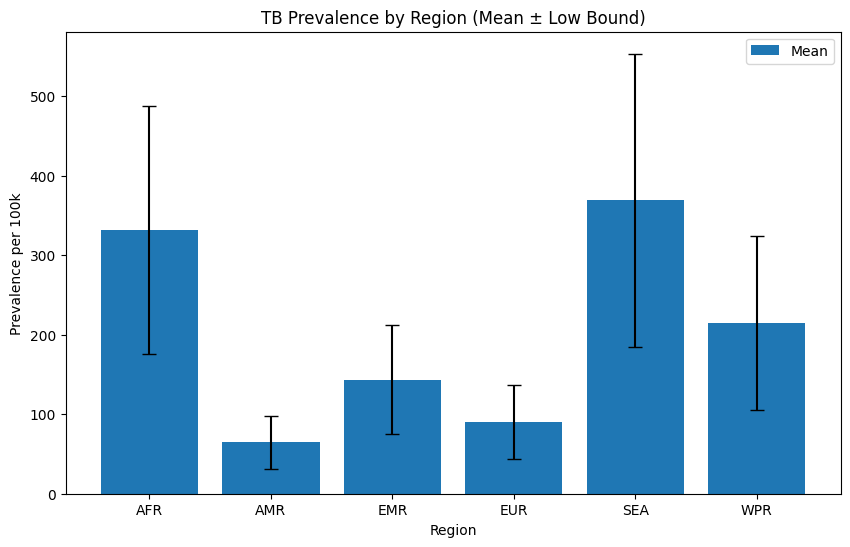

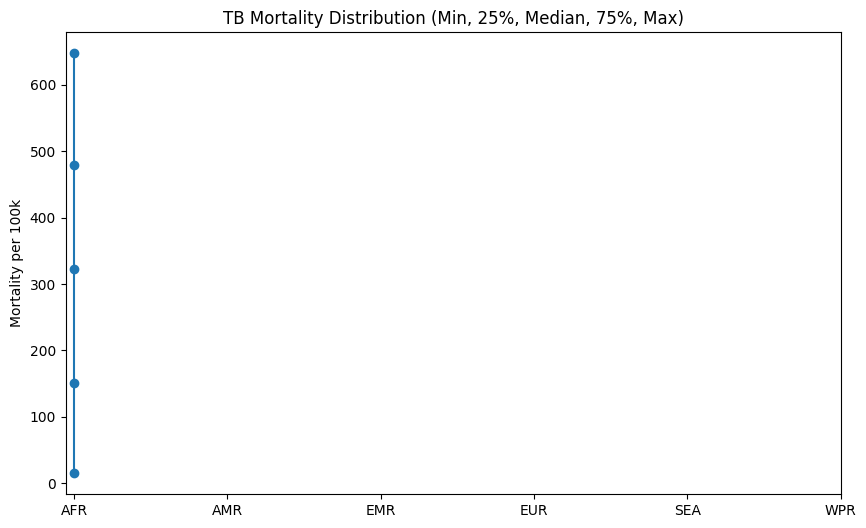

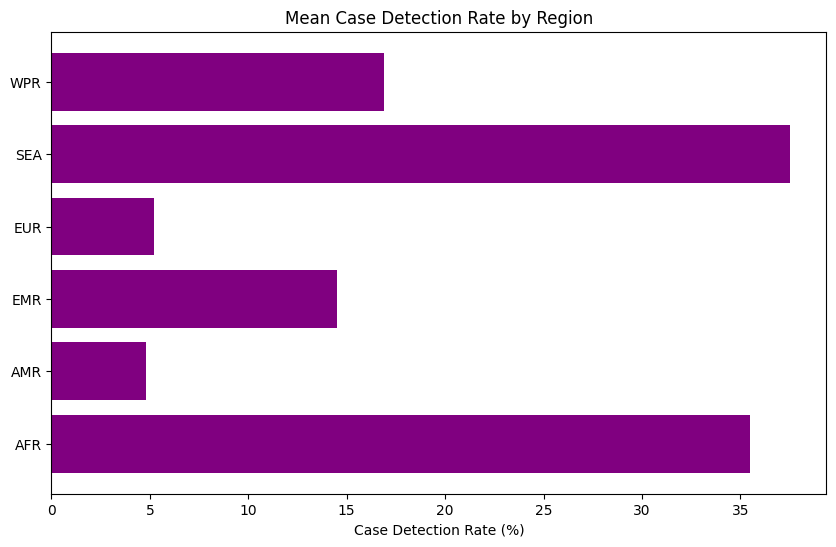

TypeError: DataFrame.__init__() got an unexpected keyword argument 'excuet'

In [ ]:


# Example Data (replace with actual data extraction)
regions = ['AFR', 'AMR', 'EMR', 'EUR', 'SEA', 'WPR']
mean_prevalence = [331.7, 64.7, 143.5, 89.9, 368.9, 214.9]
low_bounds = [175.7, 31.7, 74.8, 43.2, 184.7, 105.4]
high_bounds = [534.9, 109.5, 232.2, 153.5, 612.4, 358.2]

plt.figure(figsize=(10, 6))
plt.bar(regions, mean_prevalence, yerr=[mean_prevalence[i]-low_bounds[i] for i in range(len(regions))],
        capsize=5, label='Mean')
plt.xlabel('Region')
plt.ylabel('Prevalence per 100k')
plt.title('TB Prevalence by Region (Mean ± Low Bound)')
plt.legend()
plt.show()
stats = {
    'AFR': {'min': 15, '25%': 151, 'median': 322, '75%': 479, 'max': 647.5},
    # Add other regions similarly
}

plt.figure(figsize=(10, 6))
for i, region in enumerate(stats):
    plt.plot([i+1]*5, [stats[region][k] for k in ['min', '25%', 'median', '75%', 'max']],
             marker='o', linestyle='-')
plt.xticks([1,2,3,4,5,6], regions)
plt.title('TB Mortality Distribution (Min, 25%, Median, 75%, Max)')
plt.ylabel('Mortality per 100k')
plt.show()

mean_detection = [35.5, 4.8, 14.5, 5.2, 37.5, 16.9]  # Example values

plt.figure(figsize=(10, 6))
plt.barh(regions, mean_detection, color='purple')
plt.xlabel('Case Detection Rate (%)')
plt.title('Mean Case Detection Rate by Region')
plt.show()

pd.DataFrame({
    'Incidence': [30423, 9091, 19275, 10569, 47823, 15471],
    'Mortality': [457, 118, 59, 41, 262, 83]
}, excuet=regions)

sns.heatmap(tb, annot=True, cmap='viridis')
plt.title('Incidence vs. Mortality Heatmap')
plt.show()

hiv_deaths = [2898, 613, 1646, 636, 3977, 1182]  # Example values

plt.figure(figsize=(8, 8))
plt.pie(hiv_deaths, labels=regions, autopct='%1.1f%%')
plt.title('Proportion of HIV-Positive TB Deaths by Region')
plt.show()

In [ ]:
tb_c=tb.groupby('Country or territory name').describe(include=[float])
tb_c

NameError: name 'tb' is not defined

In [ ]:
tb_x

In [ ]:
tb_y=tb.groupby('Year').describe(include=['float'])
tb_y

Estimated prevalence of TB (all forms) per 100 000 population  \
                                                             count   
Year                                                                 
1990                                              206.0              
1991                                              208.0              
1992                                              209.0              
1993                                              209.0              
1994                                              209.0              
1995                                              209.0              
1996                                              206.0              
1997                                              207.0              
1998                                              205.0              
1999                                              208.0              
2000                                              205.0              
2001                                              205.0              
2002                                              207.0              
2003                                              208.0              
2004                                              208.0              
2005                                              209.0              
2006                                              208.0              
2007                                              210.0              
2008                                              211.0              
2009                                              211.0              
2010                                              210.0              
2011                                              213.0              
2012                                              211.0              
2013                                              210.0              

                                                                 \
            mean         std   min    25%    50%     75%    max   
Year                                                              
1990  196.323786  209.441174  2.50  38.50   98.0  321.75  647.5   
1991  195.505288  207.803219  2.80  35.75   96.0  315.75  647.5   
1992  195.398565  206.295280  2.90  34.00  100.0  305.00  647.5   
1993  195.160287  207.744287  2.90  34.00   99.0  308.00  647.5   
1994  199.293780  211.309112  2.80  33.00  103.0  310.00  647.5   
1995  198.211962  212.353157  2.50  30.00   98.0  324.00  647.5   
1996  201.078155  211.891691  2.20  33.25  102.5  329.25  647.5   
1997  200.391787  210.934462  2.00  31.00  103.0  329.50  647.5   
1998  199.420000  210.464516  1.90  29.00  104.0  338.00  647.5   
1999  194.040385  208.126714  1.80  29.75  103.5  339.00  647.5   
2000  191.793659  205.743491  2.20  29.00  103.0  341.00  647.5   
2001  186.823415  203.003696  2.90  26.00   97.0  334.00  647.5   
2002  186.779710  202.844218  3.70  25.00  100.0  320.50  647.5   
2003  178.432740  198.205639  0.91  22.75   88.5  302.00  647.5   
2004  175.138173  196.473081  0.94  21.75   89.0  305.25  647.5   
2005  170.731579  192.431703  1.70  23.00   84.0  285.00  647.5   
2006  167.446635  189.474444  1.70  21.75   87.0  265.00  647.5   
2007  159.806667  184.985186  1.80  20.00   81.0  248.50  647.5   
2008  153.512796  178.369189  1.60  22.00   73.0  232.00  647.5   
2009  148.946919  173.228849  1.90  21.00   76.0  218.50  647.5   
2010  145.963333  172.903166  1.30  19.50   74.0  211.25  647.5   
2011  141.859014  169.825490  0.97  19.00   74.0  207.00  647.5   
2012  139.845261  169.006953  0.95  19.50   67.0  202.00  647.5   
2013  138.170476  168.819585  1.90  18.00   67.0  195.25  647.5   

     Estimated prevalence of TB (all forms) per 100 000 population, low bound  \
                                                                        count   
Year                                                                            
1990                                              206.0      

In [ ]:
tb_y.to_csv('descriptive stat of years.csv')
files.download('descriptive stat of years.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>